In [1]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import glob
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import re

In [70]:
def invert_img(img):
    return cv2.bitwise_not(img)

def greyscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary_threshold(img):
    _,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    return thresh

def thicken(img):
    return cv2.medianBlur(img,3)

def my_filter2d(img):
    kernel = np.ones((3,3),np.float32)/9
    return cv2.filter2D(img,-1,kernel)

def gauss_blur(img):
    return cv2.GaussianBlur(img,(5,5),0)

In [71]:
def show_img(img, gray=False):
    plt.figure(figsize=(10,10))
    if (gray):
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)
        
def show_img_from_path(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    show_img(img, False)

In [142]:
def crop_announcements(img):
     return img[425:550,900:2500]
     
#https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/
def process_img(img):
    # apply a tophat (whitehat) morphological operator to find light
    rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,5))
    tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, rectKernel)
    invert = invert_img(tophat)
    thresh = binary_threshold(invert)
    thick = thicken(thresh)
    f2dd = my_filter2d(thick)
    show_img(f2dd)
    return f2dd

def get_announcement(announcement_img, side=None):
    processed = process_img(announcement_img)
    text = pytesseract.image_to_string(processed, config="-c tessedit_char_whitelist=!/01234567890ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz -psm 7")
    return text
    
def get_announcements_from_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cropped = crop_announcements(img)
    show_img(cropped)
    print(get_announcement(crop_announcements(img)))

i    mm Ffunfracu has slain100 anmday! I


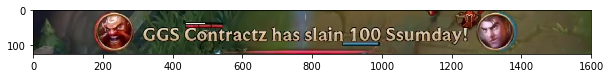

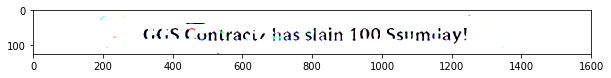

In [143]:
get_announcements_from_img("../screenshots/ss0.png")